## Benchmark Function Optimisation using
# Dragonfly Algorithm

#### Required Libraries

In [57]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Benchmark Functions

In [58]:
def Booth_function(X):
    y=(X[0]+(2*X[1])-7)**2+((2*X[0])+X[1]-5)**2
    return y

def beale_function(X):
    y=(1.5-X[0]+X[0]*X[1])**2+(2.25-X[0]+X[0]*(X[1]**2))**2+(2.625-X[0]+X[0]*(X[1]**3))**2
    return y
def himmelblaus_function(X):
    y=(X[0]**2+X[1]-11)**2+(X[0]+X[1]**2-7)**2
    return y
def Rastrigin_function(X):
    y=20+(X[0]**2+X[1]**2)-10*(math.cos(2*180*X[0])+math.cos(2*180*X[1]))
    return y


In [59]:
Actual_function_minimas={'Booth_function':[(1,3),0],'Beale_function':[(3,0.5),0],'Himmelblaus_function':[[(3,2),(-2.805118,3.131312),(-3.779310,-3.283186),(3.584428,-1.848126)],0]}

In [60]:
function_list=[Booth_function,beale_function,himmelblaus_function,Rastrigin_function]

## Updation Parameters of DA

In [61]:
def Separation_cohesion(position,best_dragonfly):
    c=random.random()
    return position+c*(best_dragonfly-position)
def align(velocities,best_velocity):
    a=random.uniform(0,1)
    return a*(best_velocity-velocities)
    # return a*((sum(np.array(best_velocity))/len(best_velocity))-velocities)

## Vanilla Dragonfly Algorithm

In [62]:
def dragonfly_algorithm(func,num_dragonflies, max_iterations):
    
    # Initialize the population of dragonflies with random positions
    num_dimensions=2
    dragonflies = [[random.uniform(-10,10) for _ in range(num_dimensions)] for _ in range(num_dragonflies)]
    velocities=[random.random() for _ in range(num_dragonflies)]
   
    best_dragonfly = None
    best_fitness = float('inf')
    count=0
    
    for iteration in range(max_iterations):
        if best_fitness>0.0001:
            count+=1
        for i, dragonfly in enumerate(dragonflies):
            # Evaluate the fitness of the current dragonfly
            fitness = func(dragonfly)
            
            # Update the best dragonfly if necessary
            if fitness < best_fitness:
                best_dragonfly = dragonfly
                best_fitness = fitness
                best_velocity=velocities
            
            # Move the dragonfly towards the best dragonfly
            for j, position in enumerate(dragonfly):               
                dragonfly[j] = Separation_cohesion(position,best_dragonfly[j])+align(velocities[j],best_velocity[j])
    # print(f'{func}')
    # print()
    # print('Position of the dragonfly:',best_dragonfly,'\nFunction value obtained at the position of the dragonfly',func(best_dragonfly))
    # print(count)
    return [best_dragonfly,func(best_dragonfly)]
   

### Result obtained from Vanilla Dragonfly Algorithm

In [63]:
dragonfly_algorithm(Booth_function,30,100)

[[1.148371194607584, 2.8726525476033435], 0.03999937596740623]

## Velocity updation of dragonflies using PSO

In [64]:
def update_velocity(best_dragonfly,position,velocities):
    c1=c2=2
    w=0.1
    alpha=random.random()
    r1=random.random()
    r2=random.random()
    cognitive_velocity=c1*r1*Separation_cohesion(position,best_dragonfly)
    social_velocity=c2*r2*Separation_cohesion(position,best_dragonfly)*0
    velocities=w*velocities+(cognitive_velocity+social_velocity)
    return velocities

## Dragonfly hybridised with PSO

In [65]:
def dragonfly_algorithm_PSO(func,num_dragonflies, max_iterations):
    
    # Initialize the population of dragonflies with random positions
    num_dimensions=2
    dragonflies = [[random.uniform(-10,10) for _ in range(num_dimensions)] for _ in range(num_dragonflies)]
    velocities=[random.random() for _ in range(num_dragonflies)]
   
    best_dragonfly = None
    best_fitness = float('inf')
    count=0
    
    for iteration in range(max_iterations):
        if best_fitness>0.0001:
            count+=1
        for i, dragonfly in enumerate(dragonflies):
            # Evaluate the fitness of the current dragonfly
            fitness = func(dragonfly)
            
            # Update the best dragonfly if necessary
            if fitness < best_fitness:
                best_dragonfly = dragonfly
                best_fitness = fitness
                best_velocity=velocities
            
            # Move the dragonfly towards the best dragonfly
            for j, position in enumerate(dragonfly):  
                velocities[j]= update_velocity(best_dragonfly[j],position,velocities[j])           
                dragonfly[j]= Separation_cohesion(position,best_dragonfly[j])+align(velocities[j],best_velocity[j])
    # print(f'{func}')
    # print()
    # print('Position of the dragonfly:',best_dragonfly,'\nFunction value obtained at the position of the dragonfly',func(best_dragonfly))
    # print(f'{count}')
    return [best_dragonfly,func(best_dragonfly)]

### Result obtained from hybridised PSO

In [66]:
print(dragonfly_algorithm_PSO(Booth_function,30,100))

[[1.0000001869898871, 2.9999997663669897], 9.825192474936459e-14]


## Ensembling Vanilla DA and Hybridised DA

In [67]:
def ensemble_da(func,num_dragonflies, max_iterations):
    da_plain=[]
    da_pso=[]
    for i in range(400):
        da_plain.append(dragonfly_algorithm(func,num_dragonflies, max_iterations))
        da_pso.append(dragonfly_algorithm_PSO(func,num_dragonflies, max_iterations))
    da_plain.sort(key=lambda x:x[1])
    da_pso.sort(key=lambda x:x[1])
    if da_plain[0][1]<da_pso[0][1]:
        print(f'Position of the dragonfly:{da_plain[0][0]}\nFunction value obtained at the position of the dragonfly{da_plain[0][1]}')
        return da_plain[0][1]
    else:
        print(f'Position of the dragonfly:{da_pso[0][0]}\nFunction value obtained at the position of the dragonfly{da_pso[0][1]}')
        return da_pso[0][1]

### Result from Ensembling 

In [68]:
ensemble_da(Rastrigin_function,30,100)

Position of the dragonfly:[4.100527524509307e-10, -0.05235979699105319]
Function value obtained at the position of the dragonfly0.0027415525474303593


0.0027415525474303593

## Comparitive Analysis

In [69]:
k=0
z=[]
for i in function_list:
    print(i.__name__)
    vda=dragonfly_algorithm(i,30, 100)
    print(f'Vanilla Dragonfly Algorithm:\nResult:\nMinimiser:{vda[0]} Function Value:{vda[1]}')
    z.append([vda[1],'V_DA'])
    da_pso=dragonfly_algorithm(i,30, 100)
    print(f'Dragonfly Algorithm Hybridised with PSO:\nResult:\nMinimiser:{da_pso[0]} Function Value:{da_pso[1]}')
    z.append([da_pso[1],'DA_PSO'])
    print(f'Ensemble Dragonfly Algorithm:\nMinimisers:')
    ensemble_da(i,30, 100)
    z.append([ensemble_da(i,30,100),'DA_Ensemble'])
    print('######################################################################')
    print()
    

Booth_function
Vanilla Dragonfly Algorithm:
Result:
Minimiser:[0.9898206878009776, 3.008459100168917] Function Value:0.00018701129022700573
Dragonfly Algorithm Hybridised with PSO:
Result:
Minimiser:[1.0000461150791018, 2.9999631039355146] Function Value:3.827881017003206e-09
Ensemble Dragonfly Algorithm:
Minimisers:
Position of the dragonfly:[1.0000000000001223, 2.9999999999998908]
Function value obtained at the position of the dragonfly2.742711595272414e-26
Position of the dragonfly:[1.000000000000027, 2.999999999999971]
Function value obtained at the position of the dragonfly1.5303901561287629e-27
######################################################################

beale_function
Vanilla Dragonfly Algorithm:
Result:
Minimiser:[-4.565680715312162, 1.184131712101306] Function Value:0.758013359489773
Dragonfly Algorithm Hybridised with PSO:
Result:
Minimiser:[3.855508002944333, 0.652275602750607] Function Value:0.052376737881122064
Ensemble Dragonfly Algorithm:
Minimisers:
Position 

In [70]:
import seaborn as sns
avg_ensemble=0
avg_vda=0
avg_da_ps0=0

for i in z:
    if i[1]=='V_DA':
        avg_vda+=i[0]
    elif i[1]=='DA_PSO':
        avg_da_ps0+=i[0]
    else:
        avg_ensemble+=i[0]
avg_da_ps0=avg_da_ps0/4
avg_vda=avg_vda/4
avg_ensemble=avg_ensemble/4
y_level=[1/avg_vda,1/avg_da_ps0,1/avg_ensemble]
xlabel=['V_DA','DA_PSO','DA_EN']

## No Scaling

<AxesSubplot:>

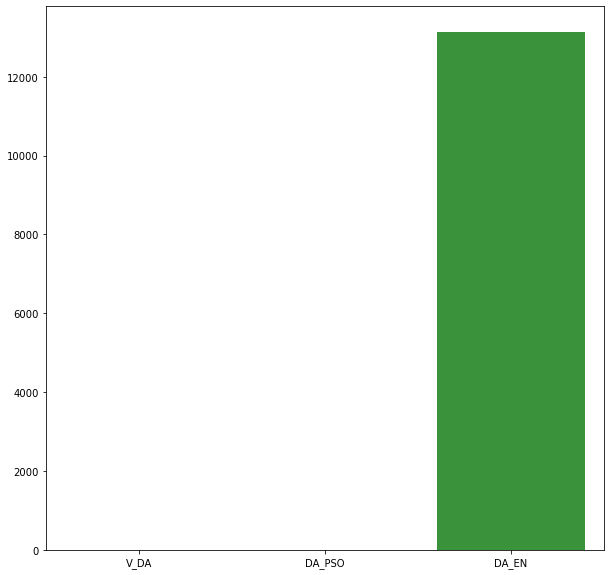

In [71]:
plt.figure(figsize=[10,10])
sns.barplot(x=xlabel,y=y_level)

## Scaling Vanilla and Hybridised DA by 100

<AxesSubplot:>

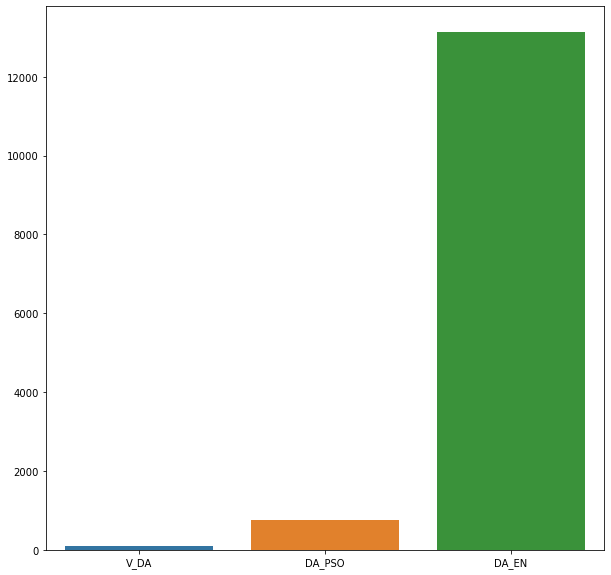

In [72]:
y_level_scaled=[(100/avg_vda),100/avg_da_ps0,1/avg_ensemble]
plt.figure(figsize=[10,10])
sns.barplot(x=xlabel,y=y_level_scaled)

## Scaling Vanilla and Hybridised DA by 1000

<AxesSubplot:>

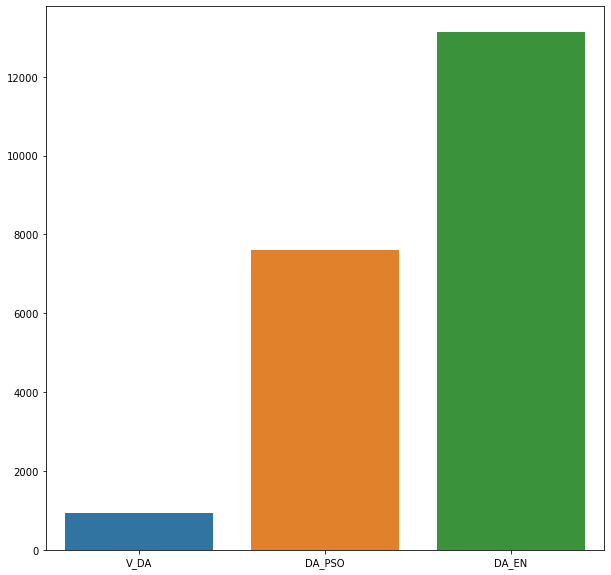

In [73]:
y_level_scaled=[(1000/avg_vda),1000/avg_da_ps0,1/avg_ensemble]
plt.figure(figsize=[10,10])
sns.barplot(x=xlabel,y=y_level_scaled)